<a href="https://colab.research.google.com/github/KevinaZeni/Titanic_datasets-email_classification/blob/main/Predicting_spam_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifiying spam email and non spam email

#**Defining the question**

**a) Specifying the  Data Analytic Question**

Our aim in this project is to identify whether an email is spam or not using the Naive Bayes Classifiation technique

**b) Defining the Metric of Success**

In [1]:
#For this project we will use the Naive Bayes algorithm to classify whether the mail is spam or ham. We will use the accuracy score and confusion matrix tell us how well our model works
#Ideally, we would not want our model to have a larger number of false positives and a success rate (accuracy score of atleast 80%)

**c) Understanding the context**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography
Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes. It can be sent in massive volume by botnets, networks of infected computers.

*Dataset Attributes*

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

**d) Recording the Experiment Design**



*   Data Preparation
*   Exploratory Data Analysis
*   Data Preprocessing
*   Building our models: Gaussian, Bernoulli, Multinomial
*   Challenging the solutions
*   Conclusion and Recommendations






#**Data Preparation**

**Importing our libraries**

In [2]:
#Data
import pandas as pd 
import numpy as np 
import nltk
nltk.download('punkt')
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import re

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Feature engineering
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

##ML
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Reading our dataset**

In [3]:
#We have extracted names from the spambase.names file by converting it into csv file an extracting the names which we will append to the spambase data provided to make sense of it.


In [4]:
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

data = pd.read_csv('spambase.data', names = names)



In [5]:
##Previewing the first ten records of our dataset

data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [6]:
#Previewing the last ten records of our data

data.tail(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4591,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,6.89,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,3.44,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,8,0
4592,0.00,0.0,1.25,0.0,2.50,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.62,0.0,0.0,0.0,0.0,0.00,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.0,1.25,0.62,0.62,0.0,0.0,0.000,0.111,0.0,0.000,0.0,0.0,1.285,4,27,0
4593,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,7.69,0.0,0.0,0.000,0.000,0.0,1.052,0.0,0.0,1.000,1,6,0
4594,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.61,0.00,0.0,0.0,0.0,0.0,0.00,6.45,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,1.61,0.0,0.0,0.000,0.630,0.0,0.000,0.0,0.0,1.727,5,19,0
4595,0.00,0.0,1.19,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.59,3.57,0.0,1.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.59,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,0
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.00,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.90,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.00,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.00,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


**Acessing basic info about our dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
data.shape

(4601, 58)

In [9]:
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [10]:
##Our dataset has 56 columns, one which is our preditor variable (spam). Our dtypes are mostly of the float type which we might need to convert

In [11]:
for i in data.columns:
    try:
        data[[i]] = data[[i]].astype(float).astype(int)
    except:
        pass

print(data.dtypes)

word_freq_make                int64
word_freq_address             int64
word_freq_all                 int64
word_freq_3d                  int64
word_freq_our                 int64
word_freq_over                int64
word_freq_remove              int64
word_freq_internet            int64
word_freq_order               int64
word_freq_mail                int64
word_freq_receive             int64
word_freq_will                int64
word_freq_people              int64
word_freq_report              int64
word_freq_addresses           int64
word_freq_free                int64
word_freq_business            int64
word_freq_email               int64
word_freq_you                 int64
word_freq_credit              int64
word_freq_your                int64
word_freq_font                int64
word_freq_000                 int64
word_freq_money               int64
word_freq_hp                  int64
word_freq_hpl                 int64
word_freq_george              int64
word_freq_650               

*Checking for unique values*

In [12]:
data.nunique()

word_freq_make                  5
word_freq_address              10
word_freq_all                   6
word_freq_3d                   11
word_freq_our                  11
word_freq_over                  5
word_freq_remove                7
word_freq_internet              8
word_freq_order                 5
word_freq_mail                  9
word_freq_receive               3
word_freq_will                  9
word_freq_people                4
word_freq_report                7
word_freq_addresses             4
word_freq_free                 11
word_freq_business              7
word_freq_email                 9
word_freq_you                  15
word_freq_credit                8
word_freq_your                 12
word_freq_font                 16
word_freq_000                   6
word_freq_money                 9
word_freq_hp                   19
word_freq_hpl                  13
word_freq_george               19
word_freq_650                   8
word_freq_lab                  12
word_freq_labs

**Data Cleaning**

*Missing values*

In [13]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [14]:
#There are no missing values in our dataset

*Checking for duplicates*

In [15]:
data.duplicated().value_counts()

False    4009
True      592
dtype: int64

In [16]:
#We will view to check whether the data is duplicated


print(data[data.duplicated()].head())
print(data[data.duplicated()].tail())

     word_freq_make  word_freq_address  ...  capital_run_length_total  spam
4                 0                  0  ...                       191     1
26                0                  0  ...                        82     1
42                0                  0  ...                        28     1
93                0                  0  ...                      2453     1
103               0                  0  ...                       292     1

[5 rows x 58 columns]
      word_freq_make  word_freq_address  ...  capital_run_length_total  spam
4541               0                  0  ...                         2     0
4550               0                  0  ...                         4     0
4556               0                  0  ...                        10     0
4571               0                  0  ...                        98     0
4587               0                  0  ...                        28     0

[5 rows x 58 columns]


In [17]:
data = data.drop_duplicates()

In [18]:
#The data might not be truly duplicated so we will keep all the records as they are

*Outliers*

In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

word_freq_make                 73
word_freq_address             105
word_freq_all                 327
word_freq_3d                   18
word_freq_our                 436
word_freq_over                 71
word_freq_remove              142
word_freq_internet            118
word_freq_order                83
word_freq_mail                340
word_freq_receive              38
word_freq_will                804
word_freq_people               85
word_freq_report               99
word_freq_addresses            61
word_freq_free                291
word_freq_business            155
word_freq_email               264
word_freq_you                  94
word_freq_credit              106
word_freq_your                196
word_freq_font                 78
word_freq_000                 113
word_freq_money                68
word_freq_hp                  683
word_freq_hpl                 383
word_freq_george              390
word_freq_650                 179
word_freq_lab                 102
word_freq_labs

In [20]:
##Our data seems to have a really high number of outliers. We work investigate the effect of these outliers and decide whether to drop them or not

#**Exploratory data Analysis**

In [21]:
##We will explore some attributes of our data to determine wg. distribution

**Univariate data Analysis**

In [22]:
#Getting the descriptive summary of our data

data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.00000,4009.00000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000
mean,0.024944,0.045148,0.104515,0.061861,0.160140,0.021202,0.050137,0.045398,0.024445,0.123722,0.010227,0.315789,0.026690,0.036169,0.019207,0.136443,0.058868,0.094288,1.36443,0.05313,0.530057,0.120728,0.038414,0.031928,0.463956,0.193814,0.315789,0.079072,0.059616,0.053879,0.030432,0.019955,0.069095,0.020205,0.058119,0.041407,0.062110,0.009479,0.048641,0.023447,0.027438,0.111250,0.017960,0.060364,0.208281,0.144924,0.001996,0.019456,0.015465,0.012971,0.002993,0.108506,0.012721,0.021452,4.820404,49.700923,284.794462,0.375655
std,0.209258,0.397983,0.396217,1.363798,0.590846,0.178146,0.318634,0.339417,0.187964,0.564377,0.107805,0.783470,0.214346,0.293711,0.168296,0.719761,0.347542,0.440683,1.67884,0.45223,1.002570,1.007899,0.259589,0.379066,1.584531,0.811962,1.760640,0.441128,0.516869,0.338911,0.307218,0.217958,0.521939,0.218507,0.457107,0.282174,0.321212,0.215215,0.393153,0.234178,0.266652,0.747648,0.161631,0.618936,0.991114,0.876449,0.054681,0.269213,0.220597,0.200626,0.080486,0.771531,0.183087,0.412551,33.214834,199.405978,617.909710,0.484352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,38.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


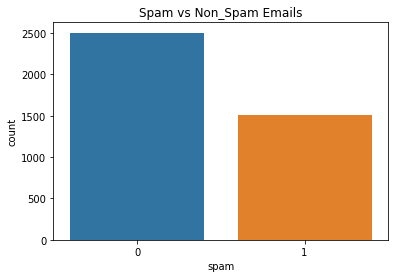

In [23]:
# Plotting our target variable 

sns.countplot(data.spam)
plt.title('Spam vs Non_Spam Emails')
plt.show()

In [24]:
#Frequenct table of our target variable
data.spam.value_counts(normalize=True)

#1 nominal {0,1} class attribute of type spam
#= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

0    0.624345
1    0.375655
Name: spam, dtype: float64

In [25]:
##From this we can see that 60% of our y values account for not spam while 39% are spam emails

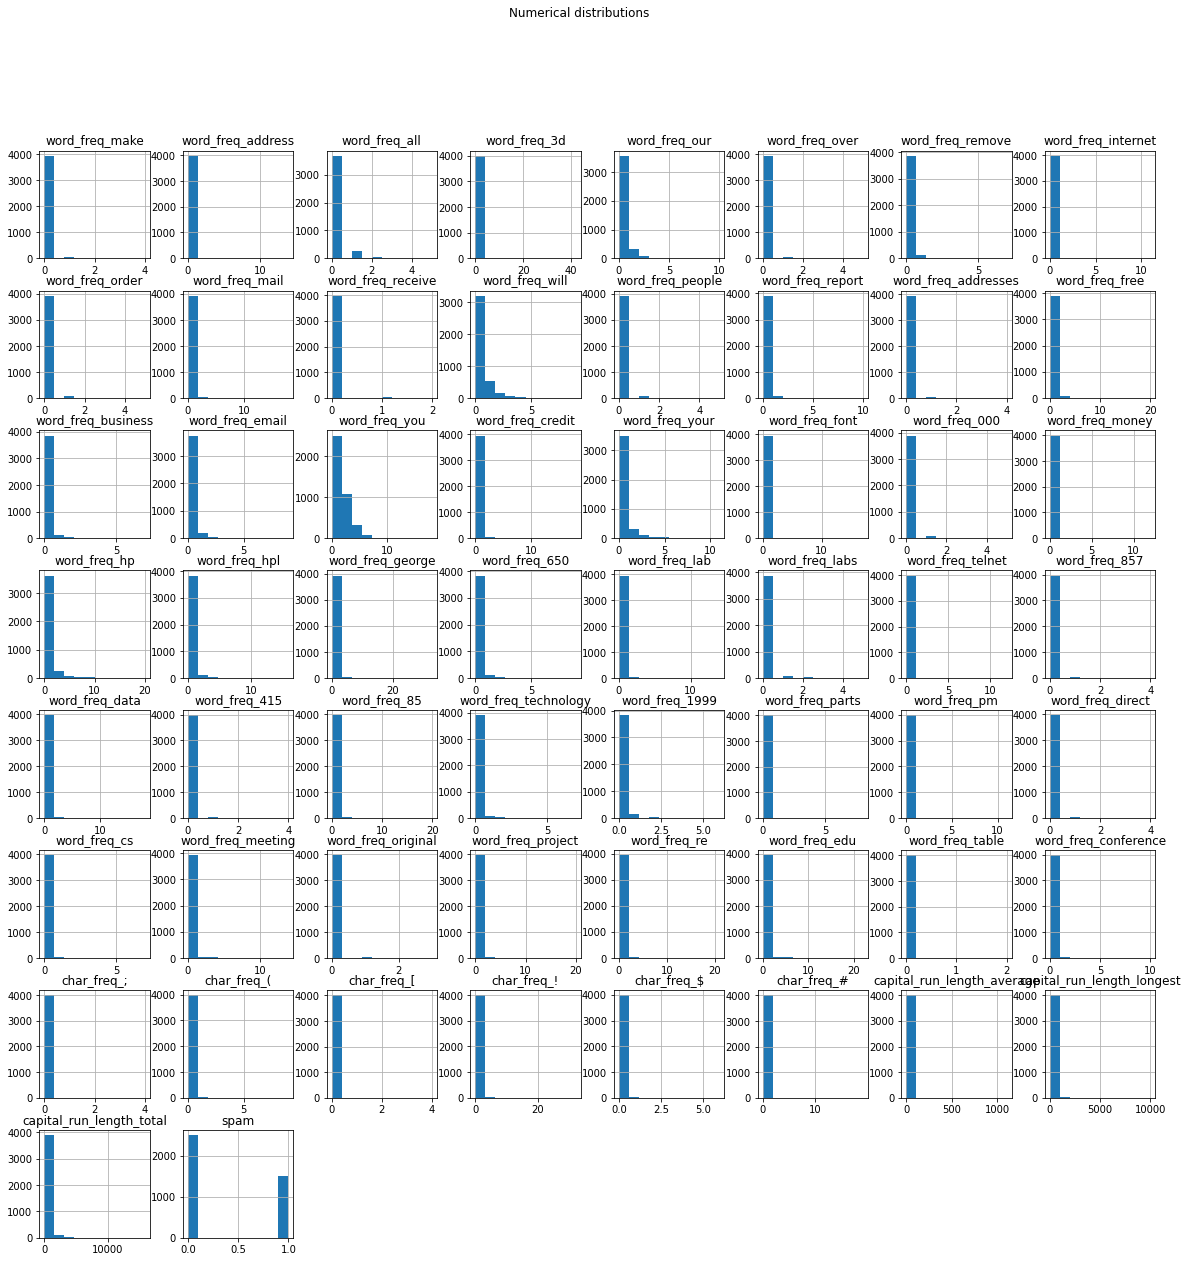

In [26]:
##We will now explore the distribution of the other features

data.hist(bins=10, figsize=(20,20))
plt.suptitle("Numerical distributions")
plt.savefig('Histogram')
plt.show()

*Measures of central tendancy*

In [27]:
#MEAN
colums_ = data[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']]

for i, col_val in enumerate(colums_):
 print('The mean of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mean()))

The mean of word_freq_make is 0.024943876278373658
The mean of word_freq_address is 0.04514841606385633
The mean of word_freq_all is 0.10451484160638563
The mean of word_freq_3d is 0.06186081317036667
The mean of word_freq_our is 0.1601396857071589
The mean of word_freq_over is 0.021202294836617612
The mean of word_freq_remove is 0.05013719131953105
The mean of word_freq_internet is 0.04539785482664006
The mean of word_freq_order is 0.024444998752806184
The mean of word_freq_mail is 0.12372162634073335
The mean of word_freq_receive is 0.010226989274133201
The mean of word_freq_will is 0.3157894736842105
The mean of word_freq_people is 0.026689947617859814
The mean of word_freq_report is 0.03616862060364181
The mean of word_freq_addresses is 0.01920678473434772
The mean of word_freq_free is 0.13644300324270392
The mean of word_freq_business is 0.05886754801696183
The mean of word_freq_email is 0.09428785233225243
The mean of word_freq_you is 1.364430032427039
The mean of word_freq_credi

In [28]:
##MODE

for i, col_val in enumerate(colums_):
 print('The mode of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].mode()))

The mode of word_freq_make is 0    0
dtype: int64
The mode of word_freq_address is 0    0
dtype: int64
The mode of word_freq_all is 0    0
dtype: int64
The mode of word_freq_3d is 0    0
dtype: int64
The mode of word_freq_our is 0    0
dtype: int64
The mode of word_freq_over is 0    0
dtype: int64
The mode of word_freq_remove is 0    0
dtype: int64
The mode of word_freq_internet is 0    0
dtype: int64
The mode of word_freq_order is 0    0
dtype: int64
The mode of word_freq_mail is 0    0
dtype: int64
The mode of word_freq_receive is 0    0
dtype: int64
The mode of word_freq_will is 0    0
dtype: int64
The mode of word_freq_people is 0    0
dtype: int64
The mode of word_freq_report is 0    0
dtype: int64
The mode of word_freq_addresses is 0    0
dtype: int64
The mode of word_freq_free is 0    0
dtype: int64
The mode of word_freq_business is 0    0
dtype: int64
The mode of word_freq_email is 0    0
dtype: int64
The mode of word_freq_you is 0    0
dtype: int64
The mode of word_freq_credit

In [29]:
#Median
for i, col_val in enumerate(colums_):
 print('The median of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].median()))

The median of word_freq_make is 0.0
The median of word_freq_address is 0.0
The median of word_freq_all is 0.0
The median of word_freq_3d is 0.0
The median of word_freq_our is 0.0
The median of word_freq_over is 0.0
The median of word_freq_remove is 0.0
The median of word_freq_internet is 0.0
The median of word_freq_order is 0.0
The median of word_freq_mail is 0.0
The median of word_freq_receive is 0.0
The median of word_freq_will is 0.0
The median of word_freq_people is 0.0
The median of word_freq_report is 0.0
The median of word_freq_addresses is 0.0
The median of word_freq_free is 0.0
The median of word_freq_business is 0.0
The median of word_freq_email is 0.0
The median of word_freq_you is 1.0
The median of word_freq_credit is 0.0
The median of word_freq_your is 0.0
The median of word_freq_font is 0.0
The median of word_freq_000 is 0.0
The median of word_freq_money is 0.0
The median of word_freq_hp is 0.0
The median of word_freq_hpl is 0.0
The median of word_freq_george is 0.0
The m

*Measures of dispersion*

In [30]:
#Skewness

for i, col_val in enumerate(colums_):
 print('The skewness of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].skew()))

The skewness of word_freq_make is 11.191264321129749
The skewness of word_freq_address is 18.575009012469167
The skewness of word_freq_all is 4.964861968239692
The skewness of word_freq_3d is 26.68794709240451
The skewness of word_freq_our is 6.718357085367314
The skewness of word_freq_over is 12.401329641104597
The skewness of word_freq_remove is 10.51964374876429
The skewness of word_freq_internet is 14.623905521575761
The skewness of word_freq_order is 11.1849872280615
The skewness of word_freq_mail is 12.784348256162177
The skewness of word_freq_receive is 11.469434540189136
The skewness of word_freq_will is 3.6111516036419262
The skewness of word_freq_people is 12.982719756110432
The skewness of word_freq_report is 16.071596444719244
The skewness of word_freq_addresses is 10.915082449970306
The skewness of word_freq_free is 12.270470317185175
The skewness of word_freq_business is 8.454196496807269
The skewness of word_freq_email is 7.923469755456701
The skewness of word_freq_you i

In [31]:
#Kurtosis

for i, col_val in enumerate(colums_):
 print('The kurtosis of ' + str(col_val) + ' ' + 'is' + ' ' + str(colums_[col_val].kurt()))

The kurtosis of word_freq_make is 155.50758089072374
The kurtosis of word_freq_address is 497.83469867000605
The kurtosis of word_freq_all is 31.491016477136746
The kurtosis of word_freq_3d is 756.7352001144991
The kurtosis of word_freq_our is 67.80006466794933
The kurtosis of word_freq_over is 225.45279631216783
The kurtosis of word_freq_remove is 160.9031496191811
The kurtosis of word_freq_internet is 338.1534634137273
The kurtosis of word_freq_order is 185.6481576733645
The kurtosis of word_freq_mail is 303.9516733563105
The kurtosis of word_freq_receive is 146.13498904647108
The kurtosis of word_freq_will is 17.59374224382593
The kurtosis of word_freq_people is 239.84876151228727
The kurtosis of word_freq_report is 403.6893273047756
The kurtosis of word_freq_addresses is 151.09594450796774
The kurtosis of word_freq_free is 239.83475265894552
The kurtosis of word_freq_business is 96.21959226961927
The kurtosis of word_freq_email is 93.99250901365875
The kurtosis of word_freq_you is 

**Bivariate Analysis**

In [32]:
#We will check for the correlation of features


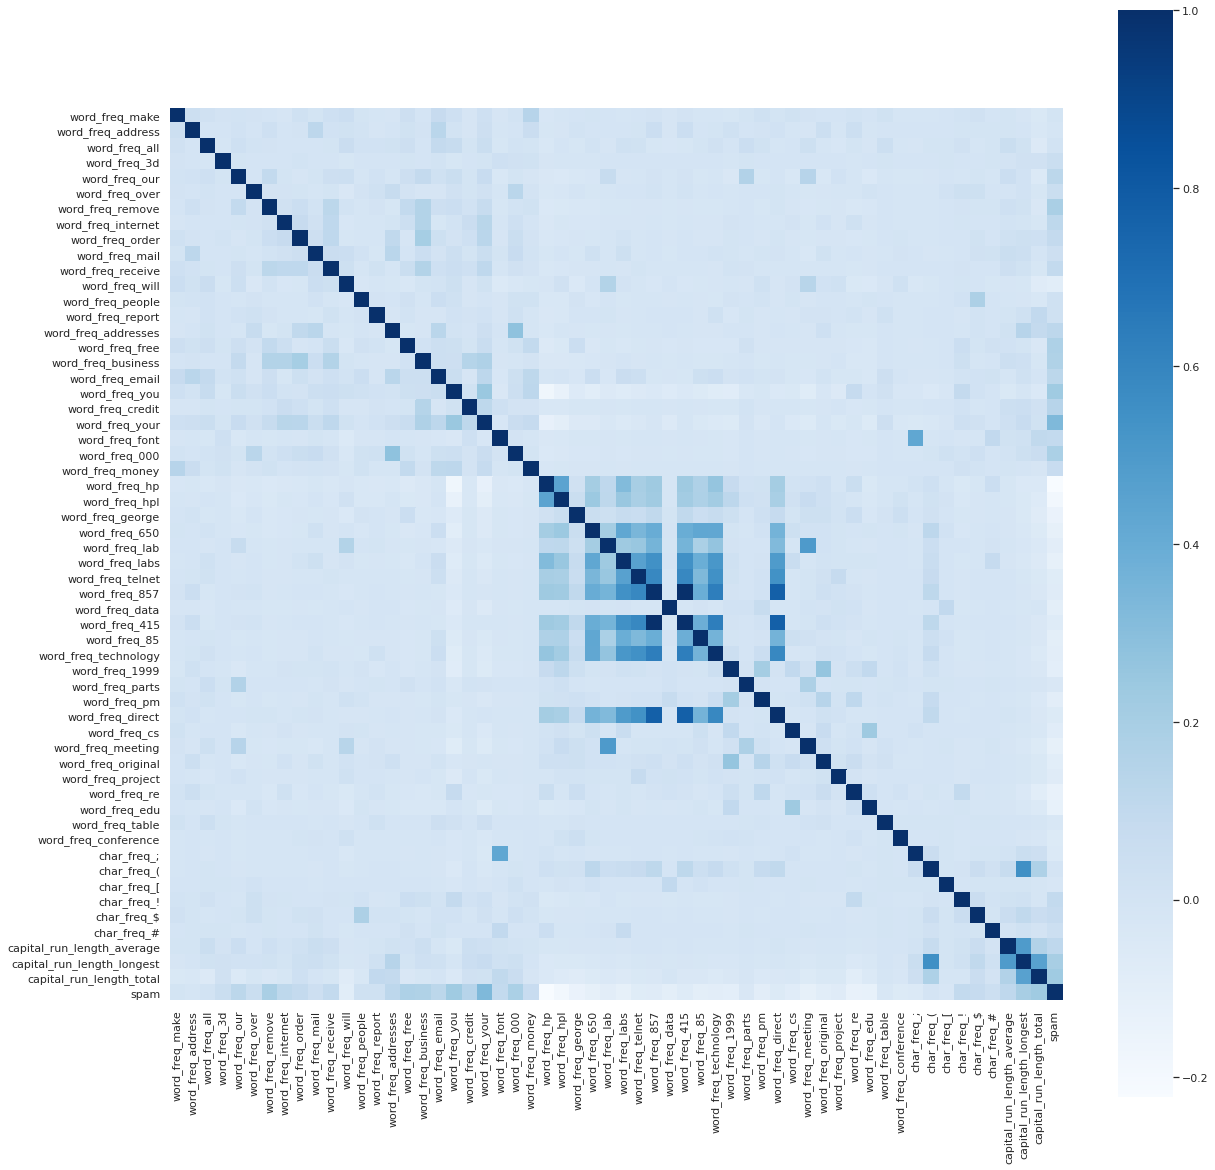

In [33]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(corr,vmax=1, cmap= 'Blues', annot=False, square=True)
plt.show()

#**Implementing the solution**

In [34]:
##Most of our features have ben converted from words to numbers hence we will go straight away to building our models
##We will randomly partition our train and test differently into i.e.  80/20, 70-30, 60-40

In [35]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam


In [36]:
X.shape

(4009, 57)

In [37]:
y.shape

(4009,)

In [38]:
#Standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.11921653, -0.1134573 , -0.26381457, ..., -0.0548138 ,
         0.05667075, -0.01099725],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.00540777,
         0.25729157,  1.20292372],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.12585091,
         2.18325138,  3.19537268],
       ...,
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.21918287, -0.26996706],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.33470951],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.39621484]])

#**a)Training our models at 80/20 split**

In [39]:
#Our first split will be an 80/20 split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

**Multinomial NB model**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

#Making predictions
predicted = mnb.predict(X_test)

#Evaluating our model performance
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 77.55610972568579

 Confusion matrix
[[398  72]
 [108 224]]

 Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       470
           1       0.76      0.67      0.71       332

    accuracy                           0.78       802
   macro avg       0.77      0.76      0.76       802
weighted avg       0.77      0.78      0.77       802



**GaussianNM Model**

In [41]:
from sklearn.naive_bayes import GaussianNB

gsb = GaussianNB()  
gsb.fit(X_train, y_train) 

#Making Predictions

predicted = gsb.predict(X_test)


#Evaluating our model performance


score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 77.55610972568579

 Confusion matrix
[[305 165]
 [ 15 317]]

 Classification report
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       470
           1       0.66      0.95      0.78       332

    accuracy                           0.78       802
   macro avg       0.81      0.80      0.78       802
weighted avg       0.83      0.78      0.77       802



**Bernoulli Model**

In [42]:
from sklearn.naive_bayes import BernoulliNB

In [43]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [44]:
#Standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.11921653, -0.1134573 , -0.26381457, ..., -0.0548138 ,
         0.05667075, -0.01099725],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.00540777,
         0.25729157,  1.20292372],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.12585091,
         2.18325138,  3.19537268],
       ...,
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.21918287, -0.26996706],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.33470951],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.39621484]])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [46]:
# Training our Bernoulli Naive Bayes Classifier
# 
# Creating our Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
clf.fit(X_train, y_train)

 

#Making Predictions

y_pred = clf.predict(X_test)

In [47]:
#Evaluating our model performance
score = accuracy_score(y_test, y_pred)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Accuracy Score: 
 86.65835411471322

 Confusion matrix
[[430  40]
 [ 67 265]]

 Classification report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       470
           1       0.87      0.80      0.83       332

    accuracy                           0.87       802
   macro avg       0.87      0.86      0.86       802
weighted avg       0.87      0.87      0.87       802



In [48]:
##Our best performing model on the 80/20 split is the Bernoulli NB model which has the highest accuracy, and least number of false positives
##We will now test if this stands with the rest of the models agaist the rest of the splits

#**b)Training our models at 70/30splits**

In [49]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [50]:
#Standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.11921653, -0.1134573 , -0.26381457, ..., -0.0548138 ,
         0.05667075, -0.01099725],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.00540777,
         0.25729157,  1.20292372],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.12585091,
         2.18325138,  3.19537268],
       ...,
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.21918287, -0.26996706],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.33470951],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.39621484]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [52]:
#We will start with our worst performing model the Gaussian NB model

**Gaussian NB Model**

In [53]:
gsb = GaussianNB()  
gsb.fit(X_train, y_train) 

#Making Predictions

predicted = gsb.predict(X_test)


#Evaluating our model performance


score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 74.4804655029094

 Confusion matrix
[[450 288]
 [ 19 446]]

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       738
           1       0.61      0.96      0.74       465

    accuracy                           0.74      1203
   macro avg       0.78      0.78      0.74      1203
weighted avg       0.82      0.74      0.74      1203



In [54]:
##Our model performed slightly worse that on a 80/20 split

**MultinomialNB model**

In [55]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

#Making predictions
predicted = mnb.predict(X_test)

#Evaluating our model performance
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 76.39235245220283

 Confusion matrix
[[609 129]
 [155 310]]

 Classification report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       738
           1       0.71      0.67      0.69       465

    accuracy                           0.76      1203
   macro avg       0.75      0.75      0.75      1203
weighted avg       0.76      0.76      0.76      1203



**Bernoulli Model**

In [56]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

#Making predictions
predicted = clf.predict(X_test)

#Evaluating our model performance
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 86.61679135494596

 Confusion matrix
[[669  69]
 [ 92 373]]

 Classification report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       738
           1       0.84      0.80      0.82       465

    accuracy                           0.87      1203
   macro avg       0.86      0.85      0.86      1203
weighted avg       0.87      0.87      0.87      1203



In [57]:
##The number of true positives and negatives increased slightly but there was not much difference in performance of the models

In [58]:
##We will finally split our data into 60/40 splits

#**c)Training our models at 60/40splits**

In [59]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [60]:
#Standardizing our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


array([[-0.11921653, -0.1134573 , -0.26381457, ..., -0.0548138 ,
         0.05667075, -0.01099725],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.00540777,
         0.25729157,  1.20292372],
       [-0.11921653, -0.1134573 , -0.26381457, ...,  0.12585091,
         2.18325138,  3.19537268],
       ...,
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.21918287, -0.26996706],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.33470951],
       [-0.11921653, -0.1134573 , -0.26381457, ..., -0.11503537,
        -0.22419839, -0.39621484]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

**Gaussian Model**

In [62]:
gsb = GaussianNB()  
gsb.fit(X_train, y_train) 

#Making Predictions

predicted = gsb.predict(X_test)


#Evaluating our model performance


score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 73.50374064837905

 Confusion matrix
[[577 400]
 [ 25 602]]

 Classification report
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       977
           1       0.60      0.96      0.74       627

    accuracy                           0.74      1604
   macro avg       0.78      0.78      0.73      1604
weighted avg       0.82      0.74      0.73      1604



**MultinomialNB model**

In [63]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

#Making predictions
predicted = mnb.predict(X_test)

#Evaluating our model performance
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 76.12219451371571

 Confusion matrix
[[776 201]
 [182 445]]

 Classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       977
           1       0.69      0.71      0.70       627

    accuracy                           0.76      1604
   macro avg       0.75      0.75      0.75      1604
weighted avg       0.76      0.76      0.76      1604



**BernoulliNB model**

In [64]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

#Making predictions
predicted = clf.predict(X_test)

#Evaluating our model performance
score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, predicted))

print('\n', 'Classification report')
print(classification_report(y_test, predicted))

Accuracy Score: 
 86.9077306733167

 Confusion matrix
[[881  96]
 [114 513]]

 Classification report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       977
           1       0.84      0.82      0.83       627

    accuracy                           0.87      1604
   macro avg       0.86      0.86      0.86      1604
weighted avg       0.87      0.87      0.87      1604



In [65]:
##So far the model with the best accuracy,has been the Bernoulli model (60/20 splits)with an 85% accuracy meaning that 15% of the emails will be msiclassified
##

**Finding our best optimized model**

Gaussian Model optimized

In [66]:
##The best perfoming Gaussian model was the one with 60/40 splits hence we will try to tune its parameters to find the best performing version 

In [67]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [68]:
X.shape

(4009, 57)

In [69]:
y.shape

(4009,)

In [70]:
# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.3s


GaussianNB(priors=None, var_smoothing=6.579332246575682e-07)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.1s finished


In [72]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [73]:
#Evaluating our model performance
score = accuracy_score(y_test, y_pred)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Accuracy Score: 
 83.66583541147132

 Confusion matrix
[[860 117]
 [145 482]]

 Classification report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       977
           1       0.80      0.77      0.79       627

    accuracy                           0.84      1604
   macro avg       0.83      0.82      0.83      1604
weighted avg       0.84      0.84      0.84      1604



In [74]:
#With hyperparameter tuning, our Gaussian model improved its accuracy to 82% which is a very great improvement compared to its previous 74%accuracy level

*Bernoulli Optimized model*

In [75]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [76]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [77]:
# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [78]:
alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

clf = GridSearchCV(BernoulliNB(), hyperparameters,verbose=1, cv=10, n_jobs=-1)
clf = clf.fit(X_train, y_train)

print(clf.best_params_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0, 'class_prior': None, 'fit_prior': True}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [79]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [80]:
#Evaluating our model performance
score = accuracy_score(y_test, y_pred)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Accuracy Score: 
 86.84538653366583

 Confusion matrix
[[882  95]
 [116 511]]

 Classification report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       977
           1       0.84      0.81      0.83       627

    accuracy                           0.87      1604
   macro avg       0.86      0.86      0.86      1604
weighted avg       0.87      0.87      0.87      1604



*Multinomial Optimized model

In [81]:
# Defining our features
X = data.iloc[:, :-1]
y = data.spam

In [82]:
# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [83]:
alpha= list(range(0, 10))
class_prior= [None]
fit_prior= [False, True]

hyperparameters = dict(alpha = alpha, class_prior = class_prior, fit_prior = fit_prior)

clf = GridSearchCV(MultinomialNB(), hyperparameters,verbose=1, cv=10, n_jobs=-1)
clf = clf.fit(X_train, y_train)

print(clf.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'alpha': 0, 'class_prior': None, 'fit_prior': True}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [84]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [85]:
#Evaluating our model performance
score = accuracy_score(y_test, y_pred)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Accuracy Score: 
 76.6209476309227

 Confusion matrix
[[786 191]
 [184 443]]

 Classification report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       977
           1       0.70      0.71      0.70       627

    accuracy                           0.77      1604
   macro avg       0.75      0.76      0.76      1604
weighted avg       0.77      0.77      0.77      1604



#**Challenging our solution**

In [86]:
#We will challenge the performance of our model with svc

In [93]:
# Splitting our data

X = data.iloc[:, 0:-1]
y = data.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##We will use LDA for dimensionality
lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)



from sklearn.svm import SVC
svc = SVC(C=0.1, gamma=0.001, kernel = 'linear')

model = svc.fit(X_train, y_train)

y_pred = model.predict(X_test)




/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [94]:
#Evaluating our model performance
score = accuracy_score(y_test, y_pred)
print('Accuracy Score: \n', (100*score))

print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Accuracy Score: 
 83.66583541147132

 Confusion matrix
[[910  67]
 [195 432]]

 Classification report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       977
           1       0.87      0.69      0.77       627

    accuracy                           0.84      1604
   macro avg       0.84      0.81      0.82      1604
weighted avg       0.84      0.84      0.83      1604



#**Conclusion and Recommendations**

In [89]:
## Our best performing model was the Bernoulli NB with tuned parameters. It attained an accuracy score of 86& with its parameters tunes
## Our model had low accuracy scores when we decided keep the duplicates but after we droped them it performed much better.
##We challenged our solution by fitting an SVC model which obtained accuracy levels of 83 %. Our Bernoulli model performs much better with higher f1 score, meaning better chances of correct classifiation as spam or not.
##Our models succeeded in meeting our metrics of success which we had set at 80% whih most of them exceeded